In [5]:
from trajectree.sequence.swap import perform_swapping_simulation

import numpy as np
from matplotlib import pyplot as plt

In [6]:
# Set simulation params
trunc = 4
N = trunc+1
error_tolerance = 1e-7

params = {
    "PA_det_loss": 0.04,
    "BSM_det_loss_1": 0.04, #  0.045,
    "BSM_det_loss_2": 0.04, # 0.135,
    "BSM_dark_counts_1": 1,
    "BSM_dark_counts_2": 1,
    "alpha_list": np.array([np.pi/2]),
    "delta_list": np.array([np.pi/2]),
    "channel_loss": 0,
    "chi": 0.24,
    "BSM_meas": {0:(2,3), 1:(6,7)},

    "if_analyze_entanglement": True,
    "calc_fidelity": False,
}

num_modes = 8
# Create vacuum state
 
# idler_angles = np.linspace(0, np.pi, 1)
# signal_angles = np.linspace(0, 4*np.pi, 30)

num_simulations = 150
visibilities = []

cache_sizes = [2]

for i in [3e-5]: # np.linspace(0.1, 0.5, 5):
    prob_same_phase = 0
    prob_diff_phase = 0

    # params['chi'] = i
    params["BSM_dark_counts_1"] = 1+i
    params["BSM_dark_counts_2"] = 1+i

    params["alpha_list"] = np.array([np.pi/2])

    fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
    print(probabilities)
    prob_same_phase += np.mean(probabilities)

    params["alpha_list"] = np.array([3*np.pi/2])

    fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
    print(probabilities)
    prob_diff_phase += np.mean(probabilities)

    visibilities.append((prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase))
# params["BSM_meas"] = {1:(2,3), 0:(6,7)}

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_diff_phase += np.mean(probabilities)

# params["alpha_list"] = np.array([np.pi/2])

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_same_phase += np.mean(probabilities)

num pa quantum channels: 6
trajectory_probs [1.]
trajectory_probs [1.]
trajectory_probs [8.96129593e-01 4.78160357e-02 2.55163692e-03 1.36336051e-04
 7.26289144e-06 4.78160793e-02 2.55135181e-03 1.36133375e-04
 7.25842793e-06 3.85483327e-07 2.55164770e-03 1.36122792e-04
 7.25156490e-06 3.82051566e-07 1.93574457e-08 1.36347684e-04
 7.24693500e-06 3.82118714e-07 1.88804497e-08 8.59289532e-10
 7.25091653e-06 3.73201574e-07 1.86765576e-08 8.57209408e-10
 3.51439683e-11]
trajectory_probs [8.03050025e-01 4.28493484e-02 2.28633416e-03 1.21870061e-04
 6.57166861e-06 4.28494220e-02 2.28641377e-03 1.22037910e-04
 6.43086708e-06 3.20733500e-07 2.28636904e-03 1.22001458e-04
 6.49154119e-06 3.20763963e-07 1.21875759e-04 6.43899773e-06
 3.14577935e-07 6.57594252e-06 3.24928375e-07]
trajectory_probs [8.03001737e-01 2.41428830e-05 7.25874817e-10 2.18229373e-14
 6.48910738e-19 2.41428832e-05 7.25874877e-10 2.18239999e-14
 6.56123855e-19 1.95100158e-23 7.25874831e-10 2.18240001e-14
 6.56155728e-19 1.972

[np.complex128(0.9813161801640083+1.308136337256946e-19j)]


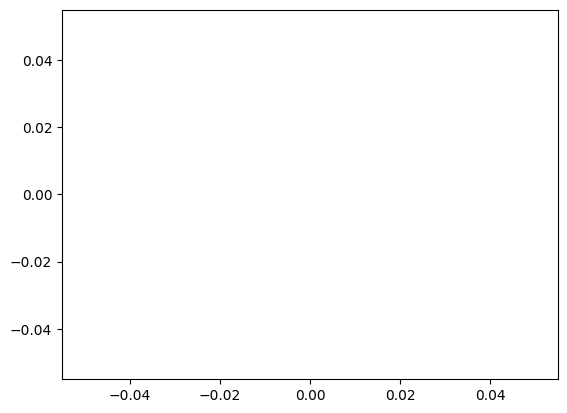

In [7]:
plt.plot(visibilities[1:])
print(visibilities)

In [4]:
(prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase)

np.complex128(0.9758537297292986+2.3090187799573835e-19j)